In [2]:
#!pip install tensorflow_model_optimization

import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, datasets, utils, callbacks, optimizers, losses
from keras.datasets import cifar10
import tensorflow_model_optimization as tfmot

2023-11-07 21:37:29.307112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 21:37:29.999123: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-11-07 21:37:29.999206: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2023-11-07 21:37:29.999215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] 

In [3]:
# Loading data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Data Transform
x_train = x_train.astype(np.float32) / 255.0
y_train = utils.to_categorical(y_train)
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean

x_test = x_test.astype(np.float32) / 255.0
y_test = utils.to_categorical(y_test)
x_test -= x_train_mean

In [4]:
# Connect to google drive to save/load model
# from google.colab import drive
# drive.mount('/content/drive')

### ResNet18

In [5]:
# # @title 기본 제목 텍스트
# kernel_initializer = 'he_normal'
# input_shape = (32,32,3)

# image_input = layers.Input(shape=input_shape)
# # first layer

# block1 = keras.Sequential([
#     layers.Conv2D(kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU()
# ])(image_input)

# # first stage
# shortcut = block1
# block2 = keras.Sequential([
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block1)

# block2 = layers.add([block2, shortcut])
# block2 = layers.ReLU()(block2)

# shortcut = block2
# block3 = keras.Sequential([
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block2)

# block3 = layers.add([block3, shortcut])
# block3 = layers.ReLU()(block3)

# # second stage
# shortcut = keras.Sequential([layers.Conv2D(filters=128, kernel_size=1, strides=2),
#                              layers.BatchNormalization()])(block3)
# block4 = keras.Sequential([
#     layers.Conv2D(filters=128, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block3)

# block4 = layers.add([block4, shortcut])
# block4 = layers.ReLU()(block4)

# shortcut = block4
# block5 = keras.Sequential([
#     layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block4)

# block5 = layers.add([block5, shortcut])
# block5 = layers.ReLU()(block5)

# # third stage
# shortcut = keras.Sequential([layers.Conv2D(filters=256, kernel_size=1, strides=2),
#                              layers.BatchNormalization()])(block5)
# block6 = keras.Sequential([
#     layers.Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block5)

# block6 = layers.add([block6, shortcut])
# block6 = layers.ReLU()(block6)

# shortcut = block6
# block7 = keras.Sequential([
#     layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block6)

# block7 = layers.add([block7, shortcut])
# block7 = layers.ReLU()(block7)

# #fourth stage
# shortcut = keras.Sequential([layers.Conv2D(filters=512, kernel_size=1, strides=2),
#                              layers.BatchNormalization()])(block7)
# block8 = keras.Sequential([
#     layers.Conv2D(filters=512, kernel_size=3, strides=2, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block7)

# block8 = layers.add([block8, shortcut])
# block8 = layers.ReLU()(block8)

# shortcut = block8
# block9 = keras.Sequential([
#     layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization(),
#     layers.ReLU(),
#     layers.Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer=kernel_initializer),
#     layers.BatchNormalization()
# ])(block8)

# block9 = layers.add([block9, shortcut])
# block9 = layers.ReLU()(block9)

# predictions = keras.Sequential([
#     layers.GlobalAveragePooling2D(),
#     layers.Flatten(),
#     layers.Dense(10)
# ])(block9)

# model = keras.Model(inputs=image_input, outputs=predictions)

In [6]:
## Applying bottleneck
def bottleneck_block(input, filters=64, expansion=1, stride=1):
    x = layers.Conv2D(filters, (1, 1), padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # x = layers.Conv2D(filters, (3, 3), padding='same', strides=stride)(x)
    x = layers.DepthwiseConv2D(3, padding='same', strides=stride)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters*expansion, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)

    if (stride == 2 or expansion==4):
        input = layers.Conv2D(filters*expansion, (1, 1), padding='same', strides=stride)(input)
        input = layers.BatchNormalization()(input)

    x = layers.Add()([x, input])
    x = layers.ReLU()(x)
    return x

kernel_initializer = 'he_normal'
input_shape = (32,32,3)

image_input = layers.Input(shape=input_shape)
# first layer
x = keras.Sequential([
    layers.Conv2D(kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer=kernel_initializer),
    layers.BatchNormalization(),
    layers.ReLU()
])(image_input)

# first stage
x = bottleneck_block(x, filters=64, expansion=1, stride=1)
x = bottleneck_block(x, filters=64, expansion=1, stride=1)
# second stage
x = bottleneck_block(x, filters=128, expansion=1, stride=2)
x = bottleneck_block(x, filters=128, expansion=1, stride=1)
# Third stage
x = bottleneck_block(x, filters=256, expansion=1, stride=2)
x = bottleneck_block(x, filters=256, expansion=1, stride=1)
# Fourth stage
x = bottleneck_block(x, filters=512, expansion=1, stride=2)
x = bottleneck_block(x, filters=512, expansion=1, stride=1)

predictions = keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(512),
    layers.Dense(10)
])(x)

model = keras.Model(inputs=image_input, outputs=predictions)

# Total parameters
model.summary()

2023-11-07 21:37:31.560983: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 21:37:31.566220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 21:37:31.566703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 21:37:31.567443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32, 32, 64)   2048        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   4160        ['sequential[0][0]']             
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_1[0][0]']               
 rmalization)                                                                                 

In [7]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 30, mode = 'auto')
from keras.callbacks import ModelCheckpoint

save_dir = './drive/MyDrive/colab_data/'
checkpoint = ModelCheckpoint(save_dir+"best_model", monitor="val_accuracy", save_best_only=True, mode='auto')
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(
          x_train,
          y_train,
          epochs=200,
          validation_split=0.1,
          callbacks = [checkpoint])

# Best Validation Accuracy
print("Best Validation Accuracy:{:.4f}".format(max(hist.history['val_accuracy'])))

2023-11-07 21:37:33.170616: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.
2023-11-07 21:37:33.523921: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 552960000 exceeds 10% of free system memory.
2023-11-07 21:37:40.560130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2023-11-07 21:37:41.319579: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe448edbdb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-07 21:37:41.319607: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-11-07 21:37:41.324334: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-07 21:37:41.522624: I tensorflow/compiler/jit/xla_compilat

1407/1407 [==============================] - ETA: 0s - loss: 1.4951 - accuracy: 0.4748

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/best_model/assets


1407/1407 [==============================] - 52s 24ms/step - loss: 1.4951 - accuracy: 0.4748 - val_loss: 1.2426 - val_accuracy: 0.5880
Best Validation Accuracy:0.5880


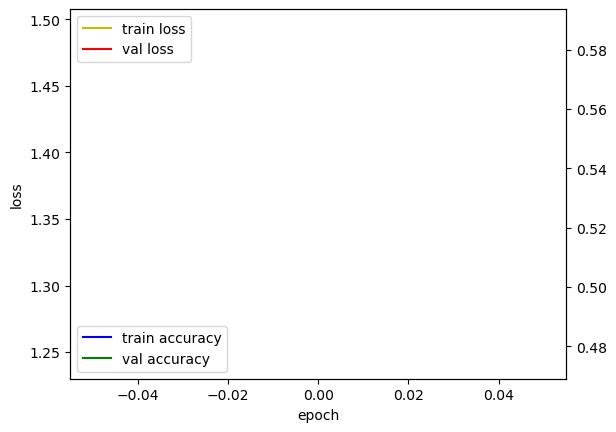

In [8]:
#plot training
# %matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [9]:
load_dir = './drive/MyDrive/colab_data/'
model_best = keras.models.load_model(load_dir+'best_model')

In [16]:
# from tensorflow import keras
# import tensorflow as tf
# import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 20
validation_split = 0.1 # 10% of training set will be used for validation set.

num_images = x_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model_best, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model_for_pruning.summary()
save_dir = './drive/MyDrive/colab_data/'
checkpoint = ModelCheckpoint(save_dir+"pruned_model", save_best_only=False)

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=save_dir),
  checkpoint
]

hist_prune = model_for_pruning.fit(x_train, y_train,
                  batch_size = batch_size,
                  epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

# Best Validation Accuracy
print("Best Validation Accuracy(Prunned):{:.4f}".format(max(hist_prune.history['val_accuracy'])))


   5/1407 [..............................] - ETA: 41s - loss: 0.0738 - accuracy: 0.9750    WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0274s vs `on_train_batch_end` time: 0.1166s). Check your callbacks.


1407/1407 [==============================] - ETA: 0s - loss: 0.0835 - accuracy: 0.9713

INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


INFO:tensorflow:Assets written to: ./drive/MyDrive/colab_data/pruned_model/assets


1407/1407 [==============================] - 108s 56ms/step - loss: 0.0835 - accuracy: 0.9713 - val_loss: 0.9599 - val_accuracy: 0.8194
Best Validation Accuracy(Prunned):0.8194


In [17]:
# Total parameters after prune
load_dir = './drive/MyDrive/colab_data/'
pruned_model = tf.keras.models.load_model(load_dir+"pruned_model")

model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
model_for_export.summary()

pruned_weights = model_for_export.get_weights()

# print sparsity
total_count = 0
total_nonzero = 0

for i, weights in enumerate(pruned_weights):
    if len(weights) > 0:
        weight_matrix = np.array(weights[0])
        non_zero_count = np.count_nonzero(weight_matrix)
        layer_count = np.prod(weight_matrix.shape)
        sparsity = 1.0 - (non_zero_count / layer_count)
        # print(f"Layer {i:>2d}: Sparsity = {sparsity:.4f}")
        total_count = total_count + layer_count
        total_nonzero = total_nonzero + non_zero_count

total_sparsity = 1.0 - (total_nonzero / total_count)
print(f"Total Sparsity: {total_sparsity:.4f}")


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32, 32, 64)   2048        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   4160        ['sequential[0][0]']             
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_1[2][0]']               
 rmalization)                                                                                 

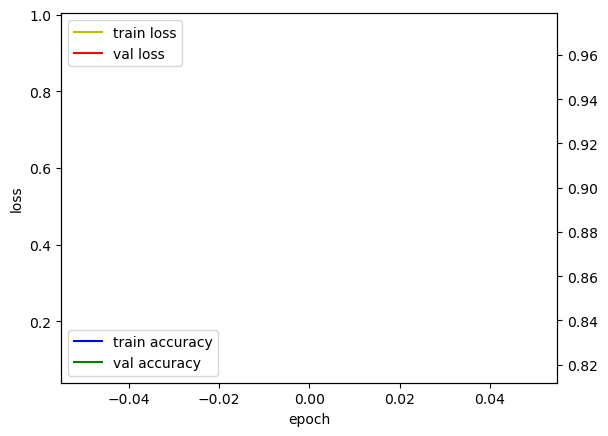

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_prune.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist_prune.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist_prune.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist_prune.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()